# **Exploratory Data Analysis**
Let's take a look at the cleaned up data file prepared from the webscraped data from Glassdoor.

In [1]:
#import appropriate libraries
#!pip install seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load the .csv saved in the cleanup notebook into a dataframe
file = r"C:\Users\Tineash\Projects\Glassdoor_webscraper\Data\AV_eng_data_cleaned.csv" #copy the file path between the double quotes
df = pd.read_csv(file)
df = df[df["Job Title"] != "Software Engineer C++ on Linux - (Jr, Sr, principal, architect)"]
df = df[df["State"] != "MI"]
df.tail(20)

,Job Title,Salary Minimum,Salary Maximum,Salary Average,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue,Average Hourly Rate,Converted Salary,City,State,Company Age (years),Title Grouping,Seniority Level
795,Audio Visual Engineer - Poly,54.0,122.0,81352.0,3.8,American Water,"Camden, NJ",5001 to 10000 Employees,1886.0,Company - Public,Energy & Utilities,"Energy, Mining & Utilities",$2 to $5 billion (USD),0,81352,Camden,NJ,136.0,engineer,na
796,AUDIO VIDEO SYSTEMS ENGINEER/Jr. CRESTRON PROG...,80.0,100.0,90000.0,3.5,State of Washington Legislative Support Services,"Olympia, WA",10000+ Employees,1889.0,Government,State & Regional Agencies,Government & Public Administration,$10+ billion (USD),0,90000,Olympia,WA,133.0,engineer,junior
797,"Senior Associate, Audio-Visual Engineer",100.0,125.0,112500.0,3.8,TM Technology Partners,Remote,1 to 50 Employees,NaN,Company - Private,Business Consulting,Management & Consulting,$5 to $10 million (USD),0,112500,Remote,Remote,NaN,engineer,senior
798,Audio Visual Technician (Sr. Engineer),56.0,105.0,76944.0,3.9,Edwards Lifesciences,"Irvine, CA",10000+ Employees,1958.0,Company - Public,Health Care Products Manufacturing,Manufacturing,$2 to $5 billion (USD),0,76944,Irvine,CA,64.0,engineer,senior
799,Senior Audio Visual Systems Engineer,52.0,96.0,70828.0,4.3,"POWER Engineers, Inc.","Boise, ID",1001 to 5000 Employees,1976.0,Company - Private,Energy & Utilities,"Energy, Mining & Utilities",$500 million to $1 billion (USD),0,70828,Boise,ID,46.0,engineer,senior
800,Audio Visual Engineer Technical Specialist,97.0,97.0,97200.0,3.6,Peraton,"Honolulu, HI",10000+ Employees,2017.0,Company - Private,Information Technology Support Services,Information Technology,$5 to $10 billion (USD),0,97200,Honolulu,HI,5.0,engineer,na
802,Professional Audio-Visual Field Engineer,49.0,89.0,66212.0,3.4,TRITECH,"New York, NY",1 to 50 Employees,NaN,Company - Public,Biotech & Pharmaceuticals,Pharmaceutical & Biotechnology,$1 to $5 million (USD),0,66212,New York,NY,NaN,engineer,na
803,Audio Visual Engineer,44.0,96.0,65147.0,4.2,Susquehanna International Group,"Bala Cynwyd, PA",1001 to 5000 Employees,1987.0,Company - Private,Stock Exchanges,Financial Services,Unknown / Non-Applicable,0,65147,Bala Cynwyd,PA,35.0,engineer,na
804,Audio Visual Technician,41.6,104.0,35.0,NaN,Corporate Audio Visual Labor,"Philadelphia, PA",1 to 50 Employees,NaN,Company - Private,NaN,NaN,Unknown / Non-Applicable,1,72800,Philadelphia,PA,NaN,technician,na
805,Audio Visual Design Engineer,44.0,75.0,57568.0,3.7,"Conference Technologies, Inc.","Atlanta, GA",201 to 500 Employees,1988.0,Company - Private,Telecommunications Services,Telecommunications,$50 to $100 million (USD),0,57568,Atlanta,GA,34.0,engineer,na


In [3]:
#Let's remind ourselves what data attributes we have
df.columns

Index(['Job Title', 'Salary Minimum', 'Salary Maximum', 'Salary Average',
       'Rating', 'Company Name', 'Location', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue',
       'Average Hourly Rate', 'Converted Salary', 'City', 'State',
       'Company Age (years)', 'Title Grouping', 'Seniority Level'],
      dtype='object')

There are a few things I am interested in looking over at first glance. First, let's begin with the **continuous values**. Company age, converted salary, and rating could all use a quick glance. Let's also plot out a boxplot comparing the minimum and maximum salaries. 

<AxesSubplot:>

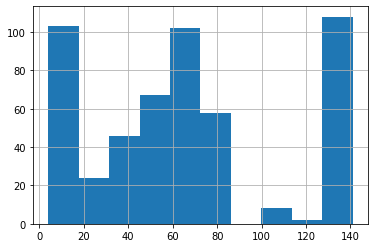

In [4]:
company_age_hist=df['Company Age (years)'].hist()
company_age_hist

<AxesSubplot:>

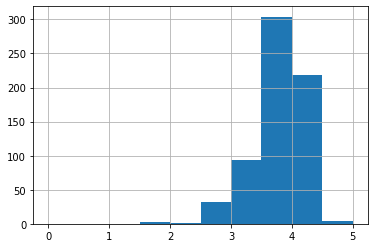

In [5]:
company_rating_hist=df['Rating'].hist(range=[0,5])
company_rating_hist

<AxesSubplot:>

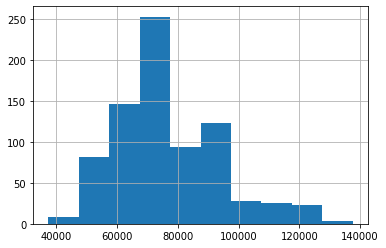

In [6]:
avg_salary_hist = df['Converted Salary'].hist()
avg_salary_hist

<AxesSubplot:>

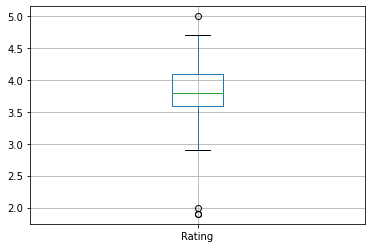

In [7]:
rating_boxplot = df.boxplot(column = 'Rating')
rating_boxplot

<AxesSubplot:>

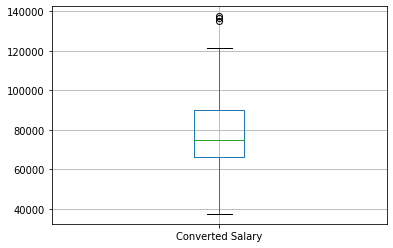

In [8]:
avg_salary_boxplot = df.boxplot(column = 'Converted Salary')
avg_salary_boxplot


<AxesSubplot:>

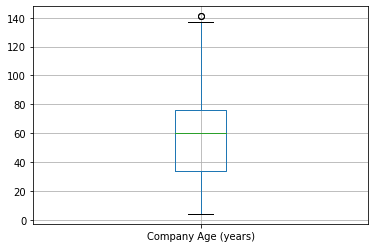

In [9]:
company_age_boxplot = df.boxplot(column = 'Company Age (years)')
company_age_boxplot

<AxesSubplot:>

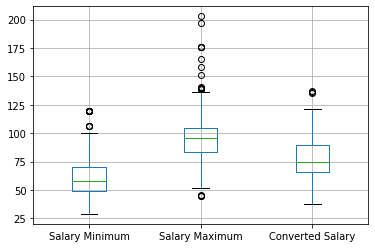

In [10]:
df['Converted Salary'] = df['Converted Salary']/1000
min_v_max_salary = df.boxplot(column = ['Salary Minimum', 'Salary Maximum', 'Converted Salary'])
min_v_max_salary

Thoughts to go here

In [11]:
#Let's see if there are correlations between some continuous variables
df[['Company Age (years)', 'Rating', 'Converted Salary']].corr() # get positive/negative coorelation between all variables listed

,Company Age (years),Rating,Converted Salary
Company Age (years),1.000000,-0.272859,-0.130721
Rating,-0.272859,1.000000,0.119300
Converted Salary,-0.130721,0.119300,1.000000


<AxesSubplot:>

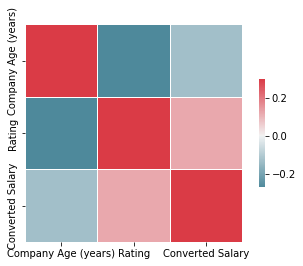

In [12]:
cmap = sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(df[['Company Age (years)', 'Rating', 'Converted Salary']].corr(),vmax=.3, center=0, cmap=cmap,
            square=True,linewidths=.5,cbar_kws={"shrink":.5})

Above, we see that there is a very slight positive coorelation between the rating of the company and the yearly salary of the company. The age of the company has a slight negative coorelation with yearly salary.

The bulk of the continuous data has now been analyzed, so lets take a look at the categorical data. Let's once again review our columns.

In [13]:
df.columns

Index(['Job Title', 'Salary Minimum', 'Salary Maximum', 'Salary Average',
       'Rating', 'Company Name', 'Location', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue',
       'Average Hourly Rate', 'Converted Salary', 'City', 'State',
       'Company Age (years)', 'Title Grouping', 'Seniority Level'],
      dtype='object')

Scanning through the data, it would be useful to see how location data, such as City and State, as well as the size of the company coorelates with salary. In addition, we should compare salaries that were hourly to salaries that were yearly to see if they tend to be lower. We can also compare seniority levels, but I image that will clearly result in a higher salary for more seniority. The type of ownership and industry/sector should be looked at to see what sectors pay more. This could be useful information for someone who wants to specialize in a certain subfield of data analytics and is looking for the greatest return on investment. 

In [14]:
df_cats = df[['Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'City', 'State', 'Seniority Level']]

The total groupings for Size is 8


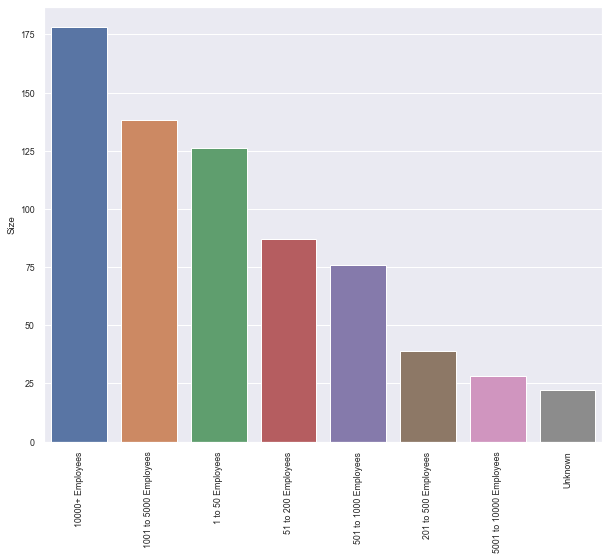

The total groupings for Type of ownership is 9


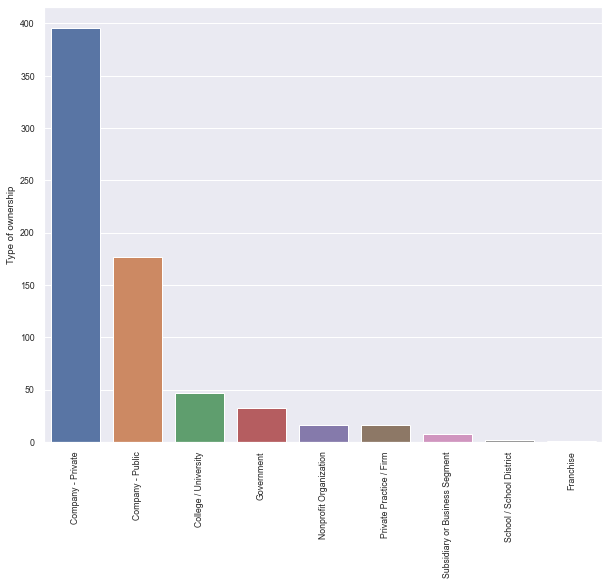

The total groupings for Industry is 36


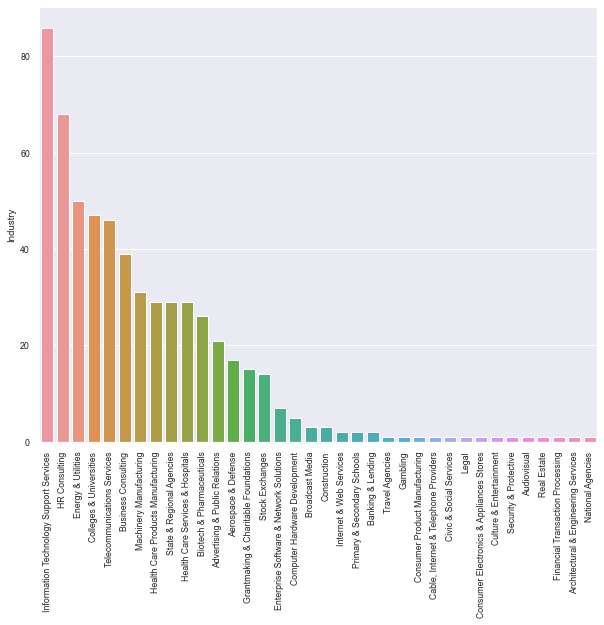

The total groupings for Sector is 20


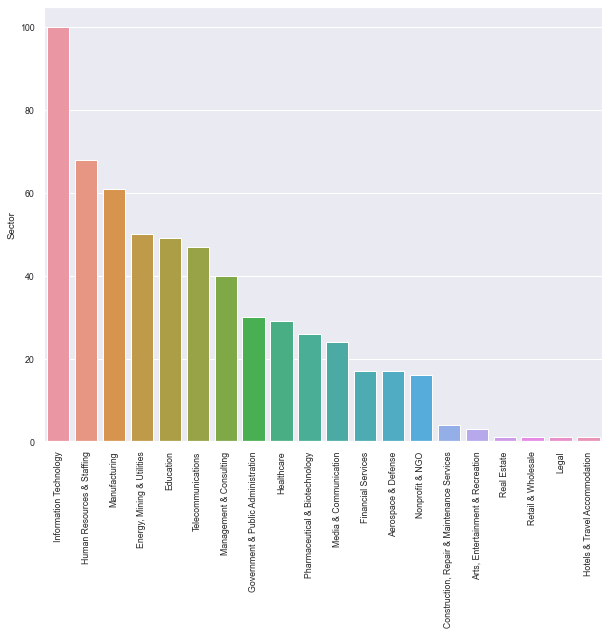

The total groupings for Revenue is 13


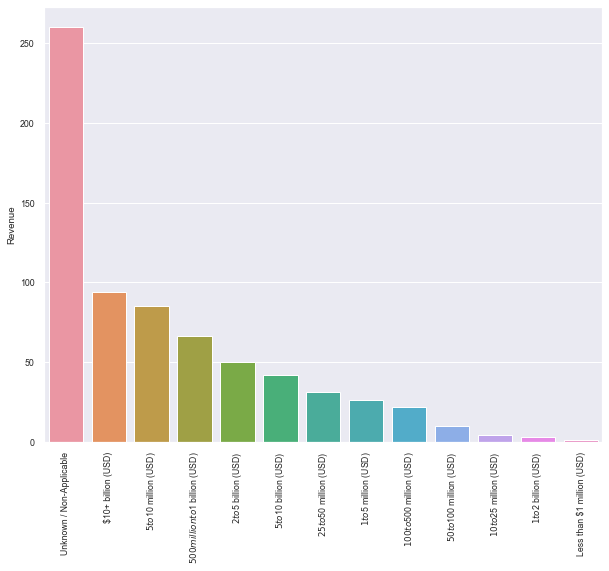

The total groupings for City is 71


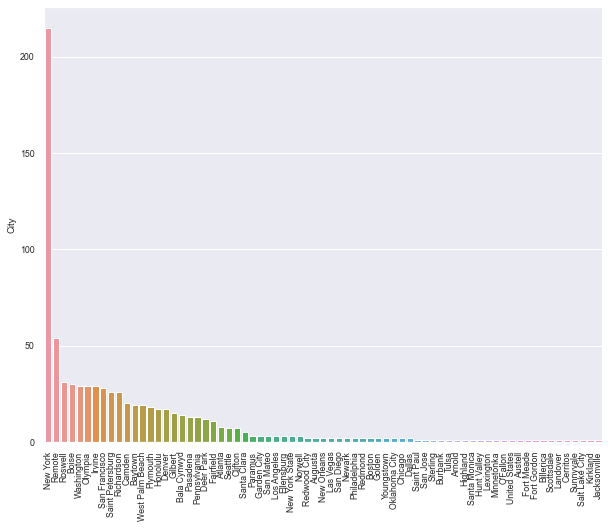

The total groupings for State is 26


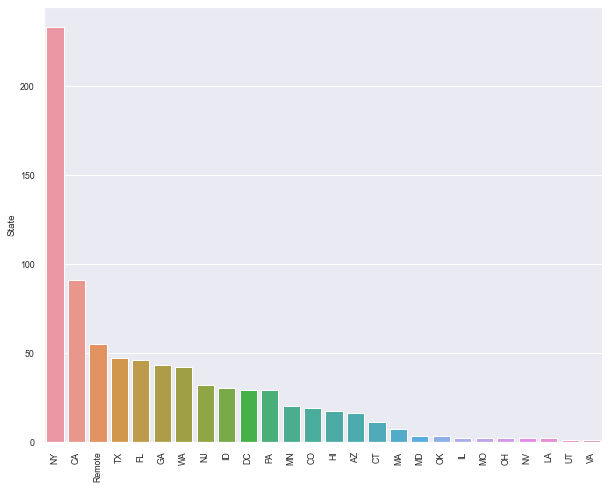

The total groupings for Seniority Level is 3


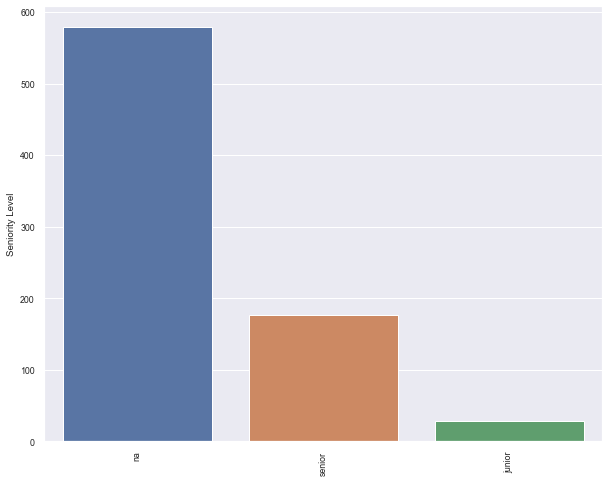

In [15]:
sns.set(rc={'figure.figsize':(10,8)},font_scale=0.8)
for i in df_cats.columns:
    cat_num = df_cats[i].value_counts()
    print("The total groupings for %s is %d" % (i, len(cat_num)))
    graph = sns.barplot(x=cat_num.index, y=cat_num, data=df_cats)
    graph.set_xticklabels(graph.get_xticklabels(), rotation=90)
    #insert line to save strings here
    plt.show()
    

Thoughts to go here

In [16]:
df.columns

Index(['Job Title', 'Salary Minimum', 'Salary Maximum', 'Salary Average',
       'Rating', 'Company Name', 'Location', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue',
       'Average Hourly Rate', 'Converted Salary', 'City', 'State',
       'Company Age (years)', 'Title Grouping', 'Seniority Level'],
      dtype='object')

In [17]:
pd.pivot_table(df, index = 'Title Grouping')

,Average Hourly Rate,Company Age (years),Converted Salary,Founded,Rating,Salary Average,Salary Maximum,Salary Minimum
Title Grouping,,,,,,,,
Unbinned,0.200000,12.428571,88.095500,2009.571429,3.685714,69384.600000,97.684000,80.272000
engineer,0.075153,63.974299,79.409448,1958.025701,3.785765,73150.155046,99.564663,63.843436
technician,0.398230,61.337349,60.700000,1960.662651,3.626437,31888.455752,79.367788,46.066549


In [18]:
df["Job Title"].value_counts().head(30)

Audio Visual Design Engineer                                          61
Audio Visual Technician                                               42
Audio Visual Sales Engineer                                           38
Audio Visual Engineer                                                 35
Systems Engineer - Audio/Visual Integration                           32
Pre-Sales Design Engineer, Audio Visual Remote                        31
Senior Audio Visual Systems Engineer                                  30
(NY) Audio/Visual Design Engineer                                     29
Audio Visual Technician (Sr. Engineer)                                29
AUDIO VIDEO SYSTEMS ENGINEER/Jr. CRESTRON PROGRAMMER                  29
Audio Visual Engineer - Information Technology Consultant - Career    28
Sr. Network Technician-Audio Visual 1                                 26
Audio Visual (AV) Engineer                                            24
Professional Audio-Visual Field Engineer           

In [19]:
pd.set_option('display.max_rows', None)
pd.pivot_table(df, index = ["Job Title", "Seniority Level"], values = 'Converted Salary').sort_values('Converted Salary', ascending = False)

,,Converted Salary
Job Title,Seniority Level,
Technical Architect - System Engineer,na,137.580000
Senior Service Engineer - Audio-Visual System Engineer,senior,136.450000
"IT Infrastructure Engineer - Washington, D.C.",na,135.336000
Entry-Level Engineering Cab (eCab) Systems & Integration Engineers,na,121.623000
Sr. Audio-Visual Engineer,senior,120.000000
"Senior Associate, Audio-Visual Engineer",senior,112.500000
Technical Sound Designer,na,112.320000
Senior Audio Visual Design Engineer,senior,109.986000
IT Support Manager II (OAV),na,109.330000


At this time, I need to go back through and rebinn the titles, including Entry-level = junior, Master = senior, etc. 

Let's take a look at the average salaries by State/City for these roles. I would hypothesize the costal states/cities would have the larger average salaries, but that will be affected by the types of jobs being posted in each state.

In [20]:
city_pivot = pd.pivot_table(df, index = 'City', values = ['Converted Salary']).sort_values('Converted Salary', ascending = False)
city_pivot

,Converted Salary
City,
San Diego,112.320000
O'Fallon,109.986000
Redmond,102.004000
Clifton,100.000000
San Mateo,98.766000
West Palm Beach,97.500000
Honolulu,97.200000
Boston,96.160000
Dallas,95.000000


Surprisingly, Georgia tops the list of average salaries, with California close behind. Utah takes the third spot. Michigan, Maryland and Montana are all low on the list. Perhaps this is due to the types of jobs being offered in these states. Let's make a pivot table showing the job titles and how many of those jobs are being offered. 

In [21]:
pd.pivot_table(df, index = ['State', 'Job Title'], values = 'Converted Salary', aggfunc = 'count').sort_values('State', ascending = False)

Converted Salary
State  Job Title                                                           
WA     Senior Service Engineer - Audio-Visual System E...                 1
       R&D Test Engineer                                                  1
       IT Support Manager II (OAV)                                        1
       IT Services Technician II                                          1
       Entry-Level Engineering Cab (eCab) Systems & In...                 3
       Audio/Video Journey Technician in IT Customer S...                 3
       Audio Visual Technician                                            3
       AUDIO VIDEO SYSTEMS ENGINEER/Jr. CRESTRON PROGR...                29
VA     Audio Visual Field Engineer                                        1
UT     Audio / Visual Support Specialist                                  1
TX     Audio Visual (AV) Engineer                                        24
       AV Field Engineer/Audio/Video Technician/Audio ...                19
       Audio Visual Collaboration Engineer                                2
       Audio Visual Design Engineer/Estimator                             2
Remote Technical Design Engineer - Audio Visual - $70k...                 1
       Senior Associate, Audio-Visual Engineer                           20
       Audio Visual Systems Design Engineer                               2
       Audio Visual Sales Engineer                                       30
       AV System Engineer                                                 1
       A/V Project Manager / Systems Design Engineer -...                 1
PA     Audio Visual Technician                                            2
       Audio Visual Field Engineer                                       13
       Audio Visual Engineer                                             14
OK     Audio Visual Field Engineer                                        1
       Audio & Visual Engineer                                            1
       Freelance Audio Engineer I                                         1
OH     Coordinator and Audio-Video Engineer                               2
NY     Audio Visual Systems Engineer                                     14
       (NY) Audio/Visual Design Engineer                                 29
       AV Engineer                                                       10
       AV Service Engineer                                                2
       AV Technician                                                      3
       Audio Visual Design Sales Engineer                                21
       Audio Visual Engineer                                             15
       Audio Visual Field Engineer                                        1
       Audio Visual Support Technician                                    1
       Audio Visual Technician                                           34
       Field Support Engineer                                             1
       Lead Audio Visual Field Technician                                23
       Professional Audio-Visual Field Engineer                          23
       Professional Audio-Visual Systems Engineer                         3
       Sr. Audio-Visual Engineer                                         19
       Systems Engineer - Audio/Visual Integration                       31
       Systems Engineer- AV                                               2
       Technical Architect - System Engineer                              1
NV     Audio Visual Design Engineer                                       1
       Audio Visual Technicians Sought                                    1
NJ     Audio Visual Sales Engineer                                        7
       Senior Audio Visual Technician                                     3
       Audio Visual Engineer - Poly                                      20
       AV Systems Engineer                                                2
MO     Unified Comms/Audio Visu

This gives us some insights. Utah is only hiring two jobs, both at senior pay levels. Georgia is hiring a large amount of cybersecurity data analysts. Meanwhile, Michigan, Montana and Maryland are largely hiring junior positions. This does give us some insights, such as senior level and cybersecurity analysts potentially earning more than general analysts. 

Let's go ahead and loop through all the data in a pivot table to see if anything stands out.

In [22]:
df.columns

Index(['Job Title', 'Salary Minimum', 'Salary Maximum', 'Salary Average',
       'Rating', 'Company Name', 'Location', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue',
       'Average Hourly Rate', 'Converted Salary', 'City', 'State',
       'Company Age (years)', 'Title Grouping', 'Seniority Level'],
      dtype='object')

In [23]:
df_pivots=df[['Job Title','Salary Minimum','Salary Maximum','Salary Average','Rating','Company Name','Location','Size','Founded','Type of ownership','Industry','Sector','Revenue','Average Hourly Rate', 'City', 'State','Company Age (years)','Title Grouping','Seniority Level','Converted Salary']]
pd.set_option('display.max_rows', None)
for i in df_pivots.columns:
    print(i) # get the column name
    if i == 'Converted Salary':
        pass
    else:
        table = pd.pivot_table(df_pivots, index = i, values='Converted Salary').sort_values('Converted Salary', ascending = False)
        print(table)

Job Title
                                                    Converted Salary
Job Title                                                           
Technical Architect - System Engineer                     137.580000
Senior Service Engineer - Audio-Visual System E...        136.450000
IT Infrastructure Engineer - Washington, D.C.             135.336000
Entry-Level Engineering Cab (eCab) Systems & In...        121.623000
Sr. Audio-Visual Engineer                                 120.000000
Senior Associate, Audio-Visual Engineer                   112.500000
Technical Sound Designer                                  112.320000
Senior Audio Visual Design Engineer                       109.986000
IT Support Manager II (OAV)                               109.330000
AV Engineer                                               103.407200
Lead Audio Visual Engineer                                101.570000
Audio Visual Engineer Technical Specialist                 97.200000
Audio Visual Design Engi

A ton of quick insights from this pivot table dump. Unsurprisingly, senior analysts make significantly more than juniors ($102k vs $69k average). Business/Cybersecurity analysts top the list of salary ranges. Smaller companies (defined as 1-200, 500-5000 employees) pay on the lower end of salaries, with 200-500 employee companies being the outlier at the higher end. It would be interesting to see if 200-500 employee companies are requesting more senior/cybersecurity jobs, which skew the average up. Public companies and government jobs pay the highst on average, with university/non-provig being the lowest. Security and HR are on the higher end as well, with biotech, grocery and universities being the bototm. Lastly, the Real Estate, IT and Government sectors are the high end of salaries.

The data bins could us esome work, specifically the title grouping. It would also be nice to have a large dataset to take care of data skewing (such as having states with 1 high job posting skewing results). I could clean the data further by removing states with a single job count ooff the lst. For now, this will work as a launchpad to make some quick ML models for correlation predictions. 